## **Cleaning data**

The objective is to create a model to predict which people would survive based on the following fields:

- **Name** (str) - The passenger name
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

### **Reading data from CSV file**

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic_2 = pd.read_csv("titanic_2_data.csv", index_col= False)
titanic_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Filling Missing Data with Data Mean** ###

In [7]:
titanic_2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Replacing missing ages with the mean of the existing ages**

In [8]:
titanic_2['Age'].fillna(titanic_2['Age'].mean(), inplace=True)
titanic_2.head(12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### **Combining SibSp (Siblings, Spouses) & Parch (Parents, Children)** ##

-SibSp is the number of siblings and spouses, and Parch is the number of parents and children. Printing out some categorical plots that will show the average survival rate by different values of SibSp and Parch. 

-Matplotlib will create a new plot each time as we iterate through this loop

-Catplot method from Seaborn, will create categorical plot using the Titanic dataset, plotting SibSp and Parch columns against the survival rate.

-The point indicates the survival rate for each level of the given feature and then the vertical bars is an error bar that corresponds to the sample size at each level. So a larger bar indicates a smaller sample size.

-People have more siblings or spouses aboard, they're less likely to survive. 

-The more parents and children, the less likely they are to survive. 

-These features are so closely related and they have a similar trajectory.

<Figure size 640x480 with 0 Axes>

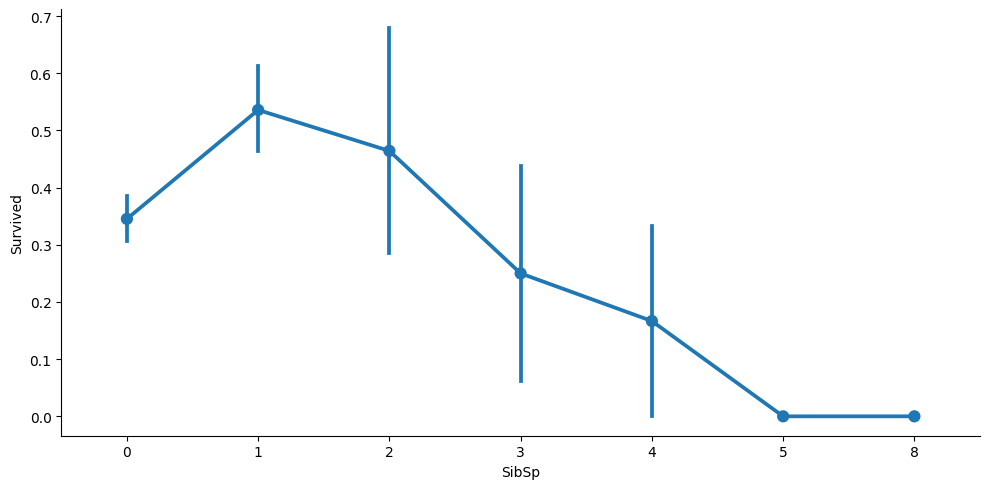

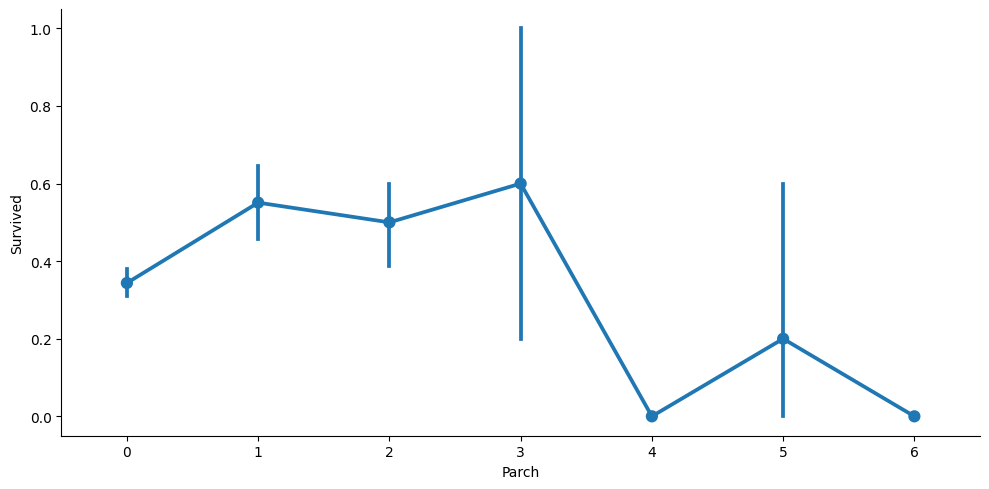

In [9]:

for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic_2, kind='point', aspect=2 )

In [10]:
titanic_2['Family_memb'] = titanic_2['Parch'] + titanic_2['SibSp']
titanic_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_memb
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### **Dropping PassengerId, SibSp, Parch variables** 

In [11]:
titanic_2.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

titanic_2.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_memb
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### **Cleaning categorical variables**
**Categorical variables are types of data which may be divided into groups**

In [12]:
# Checking missing data
titanic_2.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Family_memb      0
dtype: int64

**Filling in missing data and creating indicator for cabin**

In [13]:
# A groupby operation involves some combination of splitting the object, applying a function, and combining the results.
# False is no cabing
# True is has cabin
# Checking survivedrate based on having cabin or not

titanic_2.groupby(titanic_2['Cabin'].isnull())['Survived'].mean()




Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [14]:
# Adding cabing indicator column, Cabin_id
# Replacing NaN (no cabing) values with 0
# Replacing other cabing values for cabing with 1

titanic_2['Cabin_ind'] = np.where(titanic_2['Cabin'].isnull(), 0, 1)
titanic_2.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_memb,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1,0


**Converting sex to numeric**

In [15]:
# Creating gender dictionary
# Replacing Sex data with numerical data by using gender dictionary

gender = {'male' : 0, 'female' : 1}
titanic_2['Sex'] = titanic_2['Sex'].map(gender)
titanic_2.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_memb,Cabin_ind
0,0,3,"Braund, Mr. Owen Harris",0,22.000000,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",1,26.000000,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",0,35.000000,373450,8.0500,NaN,S,0,0
5,0,3,"Moran, Mr. James",0,29.699118,330877,8.4583,NaN,Q,0,0
6,0,1,"McCarthy, Mr. Timothy J",0,54.000000,17463,51.8625,E46,S,0,1
7,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,349909,21.0750,NaN,S,4,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,347742,11.1333,NaN,S,2,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,237736,30.0708,NaN,C,1,0


**Dropping Cabin, Embarked, Name, Ticket**

In [16]:
# Dropping Cabin, Embarked, Name, Ticket since these data are not related to surviving rate. 

titanic_2.drop(['Name','Ticket', 'Embarked', 'Cabin'], axis=1, inplace=True)
titanic_2.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_memb,Cabin_ind
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,1
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,1
7,0,3,0,2.000000,21.0750,4,0
8,1,3,1,27.000000,11.1333,2,0
9,1,2,1,14.000000,30.0708,1,0


In [17]:
# Checking if there is any null data

titanic_2.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Family_memb    0
Cabin_ind      0
dtype: int64

### **Splitting data into train, validation, and test set**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
titanic_2.head(10)

,Survived,Pclass,Sex,Age,Fare,Family_memb,Cabin_ind
0,0,3,0,22.000000,7.2500,1,0
1,1,1,1,38.000000,71.2833,1,1
2,1,3,1,26.000000,7.9250,0,0
3,1,1,1,35.000000,53.1000,1,1
4,0,3,0,35.000000,8.0500,0,0
5,0,3,0,29.699118,8.4583,0,0
6,0,1,0,54.000000,51.8625,0,1
7,0,3,0,2.000000,21.0750,4,0
8,1,3,1,27.000000,11.1333,2,0
9,1,2,1,14.000000,30.0708,1,0


- Splitting up our full data set into training set, validation set, test set.

- 60% of our examples will be in the training set.

- 20% of our examples will be in the validation set.

- 20% of our examples will be in the test set.

**Feature**
- Features are variables which acts as the input in the system. Prediction models uses these features to make predictions. 

**Label**
- Labels are the final output or target Output. They are what you're attempting to predict.  We obtain labels as output when provided with features as input.

- Splitting our data into our features by dropping the survived field, which is then just going to leave the fields that we're using to make a prediction.

- Our labels, which is just our survived field.

- First, we need to pass in our features, and pass in our labels.

- To split features and labels into three separate data sets, training, validation, and test.

- But, train test split method can only handle splitting a dataset into two. We will be doing split in two separate passes through this method.

- In first pass, we will set 40% of the data for our test set.

- And we will leave the 60% for the training set. 

- And we will run train test split again after this, to split what we left for test set in half to leave 20% for the validation set, and 20% for the test set.

- And now we will split this 40% in half. (Set the test set size to 50%.) 

- And we will be splitting is the x test, and the y test. 

- Taking 40% of the test set data and splitting in half to then create x val x test, y val, and y test.

- So we will create a loop where we will iterate through y train, y val and y test. And then each iteration will print out the length of that given data set, divided by the length of the labels data set which represents our full data set. 

- And we will round to two decimal places.

- We will write all these datasets to csv files.


In [19]:
# Features are variables which acts as the input in the system. Prediction models uses these features to make predictions. 
# Labels are the final output or target Output. They are what you're attempting to predict.  We obtain labels as output when provided with features as input.

features = titanic_2.drop('Survived', axis=1)
labels = titanic_2['Survived']


# 60% for training set, 40% for test set 
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)

# Data for test set will be divided into two. 20% for test set and 20% for validation set
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)


# To print out the all data percentage. 
data = [y_train, y_test, y_val]
data_labels = ["Train: ", "Test: ", "Validation: "]


for (data_label, dataset) in zip(data_labels,data):

    print ( (data_label) , round(len(dataset)/len(labels), 2))

Train:  0.6
Test:  0.2
Validation:  0.2


## ***Write out all data**

In [20]:
# in order to "fit" your model, you need to pass in train_features and train_labels.

# x_train.pop(x_train.columns[0]) # Remove Unnamed column
x_train.to_csv("train_features.csv", index=False)
y_train.to_csv("train_labels.csv", index=False)


# Once you have that stored model, you need to pass in test_features, val_features and test_labels and val_labels into predict, in order to generate new "predict"

# x_val.pop(x_val.columns[0])  # Remove Unnamed column
x_val.to_csv("val_features.csv", index=False)
y_val.to_csv("val_labels.csv", index=False)

# x_test.pop(x_test.columns[0])  # Remove Unnamed column
x_test.to_csv("test_features.csv", index=False)
y_test.to_csv("test_labels.csv", index=False)


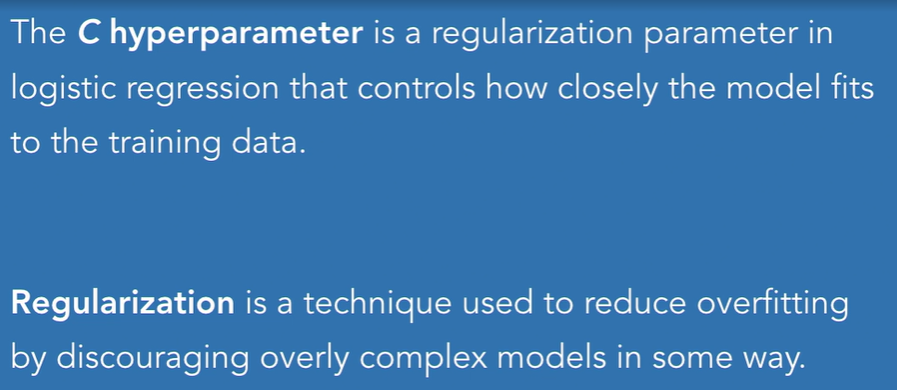
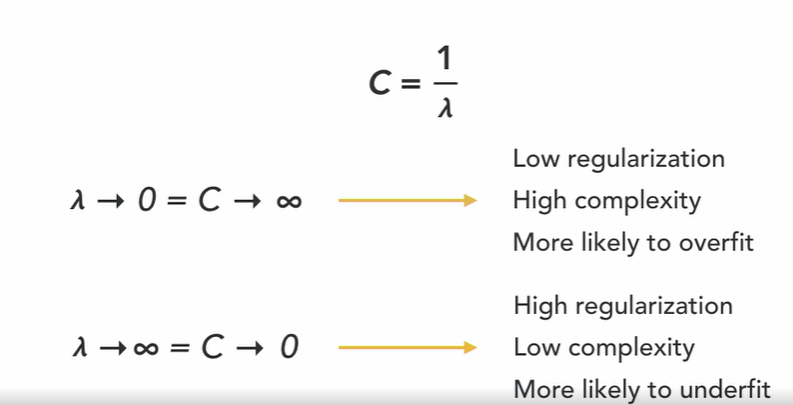

## 1- Logistic Regression: Fit and evaluate a model

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1. 

https://www.ibm.com/topics/logistic-regression

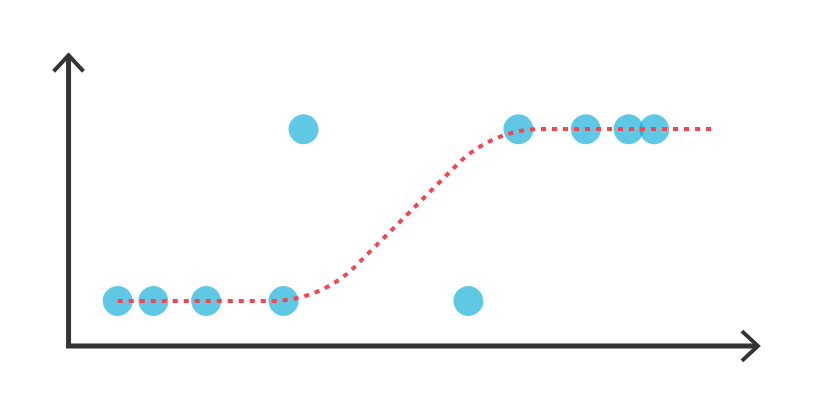

In [21]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings

# To not having any future warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Rading the data from stored csv files

tr_features = pd.read_csv('train_features.csv')

# We indicated header=None, for the labels because the labels were written out as a pandas series, which does not carry a column name.
# So if you do not pass in header=None. Pandas will take the first row and assume that's the name of the column
tr_labels = pd.read_csv('train_labels.csv', header=None)

# Removing the extra row at the top
tr_labels.drop(index=tr_labels.index[0], axis=0, inplace=True) 




### Hyperparameter tuning

#### What Is A Hyperparameter?
A machine learning model has multiple parameters that are not trained by the training set. These parameters control the accuracy of the model. Therefore, the hyperparameters are particularly important in a data science project.

The hyperparameters are configured up-front and are provided by the caller of the model before the model is trained.

https://medium.com/fintechexplained/what-is-grid-search-c01fe886ef0a

#### What Is Grid Search?
Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. The model is also known as an estimator.

In [22]:
# Function to print out results in detail

def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))


CV just means cross validation. Its a way of using all of your available training data to inform your model, while also using that data to make predictions on how well the model will be able to predict outcomes on new data. Its useful when you have small datasets

In [23]:
# cv stands for cross validation

lr = LogisticRegression()
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

# print (tr_labels)
# print (tr_features)

print_results(cv)

BEST PARAMS: {'C': 1}

0.67 (+/-0.077) for {'C': 0.001}
0.708 (+/-0.098) for {'C': 0.01}
0.777 (+/-0.134) for {'C': 0.1}
0.8 (+/-0.118) for {'C': 1}
0.794 (+/-0.116) for {'C': 10}
0.794 (+/-0.116) for {'C': 100}
0.794 (+/-0.116) for {'C': 1000}


c:\Users\Mehmet Sahan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Mehmet Sahan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [24]:
# Find out best estimator

cv.best_estimator_

LogisticRegression(C=1)

### Write out pickled model

**Save the model with Pickle**

- To save the ML model using Pickle all we need to do is pass the model object into the dump() function of Pickle. This will serialize the object and convert it into a “byte stream” that we can save as a file called model.pkl. You can then store, or commit to Git, this model and run it on unseen test data without the need to re-train the model again from scratch.

pickle.dump(model, open('model.pkl', 'wb'))

**Load the model from Pickle**

- To load a saved model from a Pickle file, all you need to do is pass the “pickled” model into the Pickle load() function and it will be deserialized. By assigning this back to a model object, you can then run your original model’s predict() function, pass in some test data and get back an array of predictions.

pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

In [25]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

## 2- Support Vector Machines: Fit and evaluate a model

### Reading Data

In [26]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv', header=None)

# Removing the extra row at the top
tr_labels.drop(index=tr_labels.index[0], axis=0, inplace=True) 

### Hyperparameter tuning

In [27]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [28]:
svc = SVC()
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10]
}

cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


In [29]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

### Write out pickled model

In [30]:
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

## 3- Multilayer Perceptron: Fit and evaluate a model

### Read in Data

In [31]:
import joblib
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv', header=None)

# Removing the extra row at the top
tr_labels.drop(index=tr_labels.index[0], axis=0, inplace=True)

### Hyperparameter tuning

In [32]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [33]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

c:\Users\Mehmet Sahan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Mehmet Sahan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Mehmet Sahan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Mehmet Sahan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.728 (+/-0.135) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.723 (+/-0.118) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.693 (+/-0.071) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.787 (+/-0.134) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.789 (+/-0.138) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.788 (+/-0.123) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.803 (+/-0.119) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.813 (+/-0.122) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.803 (+/-0.102) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'lea

c:\Users\Mehmet Sahan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
cv.best_estimator_

MLPClassifier(learning_rate='invscaling')

### Write out pickled model

In [35]:
joblib.dump(cv.best_estimator_, 'MLP_model.pkl')

['MLP_model.pkl']

## 4- Random Forest: Fit and evaluate a model

### Read in Data

In [36]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv', header=None)

# Removing the extra row at the top
tr_labels.drop(index=tr_labels.index[0], axis=0, inplace=True)

### Hyperparameter tuning

In [37]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [38]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 4, 'n_estimators': 250}

0.783 (+/-0.103) for {'max_depth': 2, 'n_estimators': 5}
0.788 (+/-0.115) for {'max_depth': 2, 'n_estimators': 50}
0.794 (+/-0.111) for {'max_depth': 2, 'n_estimators': 250}
0.803 (+/-0.089) for {'max_depth': 4, 'n_estimators': 5}
0.822 (+/-0.113) for {'max_depth': 4, 'n_estimators': 50}
0.826 (+/-0.104) for {'max_depth': 4, 'n_estimators': 250}
0.817 (+/-0.106) for {'max_depth': 8, 'n_estimators': 5}
0.807 (+/-0.084) for {'max_depth': 8, 'n_estimators': 50}
0.822 (+/-0.066) for {'max_depth': 8, 'n_estimators': 250}
0.794 (+/-0.088) for {'max_depth': 16, 'n_estimators': 5}
0.815 (+/-0.041) for {'max_depth': 16, 'n_estimators': 50}
0.805 (+/-0.021) for {'max_depth': 16, 'n_estimators': 250}
0.798 (+/-0.05) for {'max_depth': 32, 'n_estimators': 5}
0.811 (+/-0.022) for {'max_depth': 32, 'n_estimators': 50}
0.809 (+/-0.028) for {'max_depth': 32, 'n_estimators': 250}
0.8 (+/-0.036) for {'max_depth': None, 'n_estimators': 5}
0.815 (+/-0.029

In [39]:
cv.best_estimator_

RandomForestClassifier(max_depth=4, n_estimators=250)

### Write out pickled model

In [40]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

## 5- Boosting: Fit and evaluate a model

### Read in Data

In [41]:
import joblib
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv', header=None)

# Removing the extra row at the top
tr_labels.drop(index=tr_labels.index[0], axis=0, inplace=True)

### Hyperparameter tuning

In [42]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [43]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.83 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.841 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.822 (+/-0.052) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.818 (+/-0.043) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.826 (+/-0.047) for {'learning_r

In [44]:
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

### Write out pickled model

In [45]:
joblib.dump(cv.best_estimator_, 'GB_model.pkl')

['GB_model.pkl']

## Compare model results and final model selection

In this section, we will do the following:
1. Evaluate all of our saved models on the validation set
2. Select the best model based on performance on the validation set
3. Evaluate that model on the holdout test set

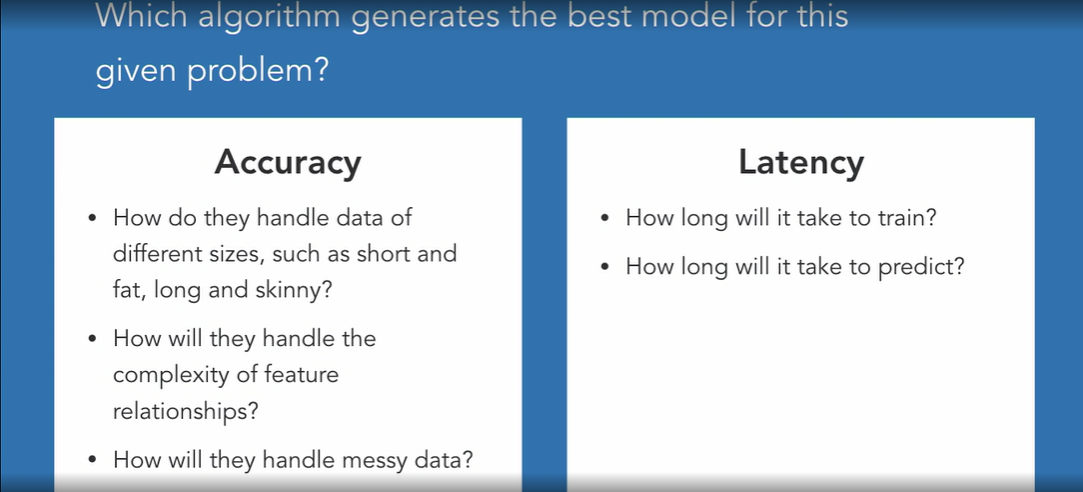

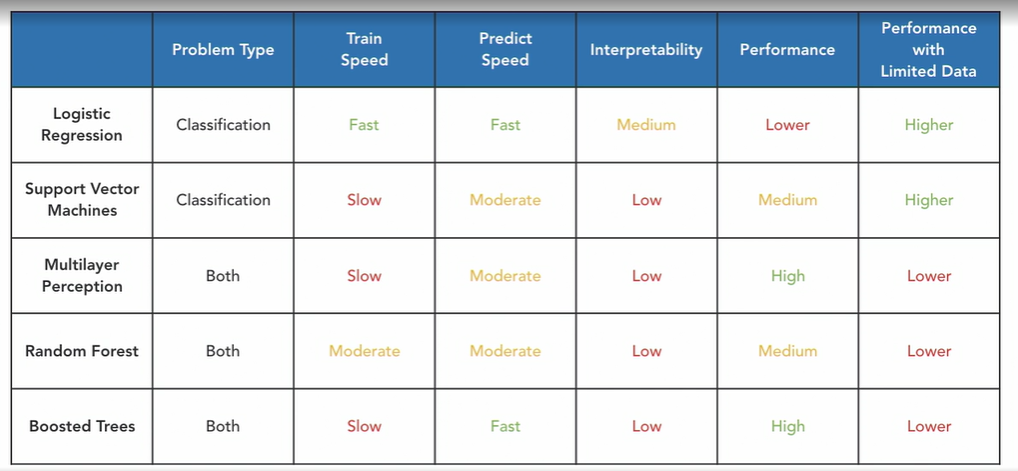

### Read in Data

In [4]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv', header=None)

# Removing the extra row at the top
val_labels.drop(index=val_labels.index[0], axis=0, inplace=True)

val_labels.to_csv('val_labels1.csv', index=False)

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv', header=None)

# Removing the extra row at the top
te_labels.drop(index=te_labels.index[0], axis=0, inplace=True)

### Read in Models

In [5]:
models = {}

for mdl in ['LR', 'SVM', 'MLP', 'RF', 'GB']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [48]:
models

{'LR': LogisticRegression(C=1),
 'SVM': SVC(C=0.1, kernel='linear'),
 'MLP': MLPClassifier(learning_rate='invscaling'),
 'RF': RandomForestClassifier(max_depth=4, n_estimators=250),
 'GB': GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)}

### Evaluate models on the validation set

In [18]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average='weighted'), 3)
    recall = round(recall_score(labels, pred, average='weighted'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))
    

In [19]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)
    

LR -- Accuracy: 0.775 / Precision: 0.772 / Recall: 0.775 / Latency: 2.0ms
SVM -- Accuracy: 0.747 / Precision: 0.743 / Recall: 0.747 / Latency: 3.0ms
MLP -- Accuracy: 0.77 / Precision: 0.767 / Recall: 0.77 / Latency: 3.0ms
RF -- Accuracy: 0.809 / Precision: 0.812 / Recall: 0.809 / Latency: 29.9ms
GB -- Accuracy: 0.815 / Precision: 0.814 / Recall: 0.815 / Latency: 3.0ms


### Evaluate best model on test set

In [20]:
evaluate_model('Random Forest', models['RF'], te_features, te_labels)

Random Forest -- Accuracy: 0.793 / Precision: 0.801 / Recall: 0.793 / Latency: 23.6ms
